# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis 
The attached _logins.json_ file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the data
dfl = pd.read_json('logins.json')
dfl.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
dfl.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
dfl.shape

(93142, 1)

In [5]:
# Check for data quality: 
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


_No null values - Good!_

In [6]:
dfl.set_index('login_time', inplace=True)
dfl['count'] = 1

In [7]:
# Aggregate login counts based on 15-minute time intervals
rdf = dfl.resample('15T', label='right').sum()
rdf.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [8]:
rdf.tail()

,count
login_time,
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2
1970-04-13 18:45:00,7
1970-04-13 19:00:00,6


In [9]:
rdf.shape

(9788, 1)

In [10]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


So, we have 9788 records from 1970-01-01 20:15:00 to 1970-04-13 19:00:00.
There are null values in count column.

In [11]:
# Filling missing value with 0
rdf = rdf.fillna(0)

In [12]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:15:00 to 1970-04-13 19:00:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


No null value in count column now.

In [13]:
# Exstract features from the dataset
rdf['time'] = pd.to_datetime(rdf.index)

In [14]:
print(type(rdf.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
rdf['month'] = rdf.time.dt.month
rdf['day'] = rdf.time.dt.day
rdf['hour'] = rdf.time.dt.hour
rdf['week'] = rdf.time.dt.week
rdf['weekday'] = rdf.time.dt.weekday

In [16]:
rdf.head()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3
1970-01-01 21:00:00,7,1970-01-01 21:00:00,1,1,21,1,3
1970-01-01 21:15:00,1,1970-01-01 21:15:00,1,1,21,1,3


In [17]:
rdf.tail()

,count,time,month,day,hour,week,weekday
login_time,,,,,,,
1970-04-13 18:00:00,5,1970-04-13 18:00:00,4,13,18,16,0
1970-04-13 18:15:00,5,1970-04-13 18:15:00,4,13,18,16,0
1970-04-13 18:30:00,2,1970-04-13 18:30:00,4,13,18,16,0
1970-04-13 18:45:00,7,1970-04-13 18:45:00,4,13,18,16,0
1970-04-13 19:00:00,6,1970-04-13 19:00:00,4,13,19,16,0


### Login activities in different months

In [18]:
# Group by month
print ('[Grouping by month]')
print (rdf.groupby('month')['count'].aggregate(np.sum))

[Grouping by month]
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

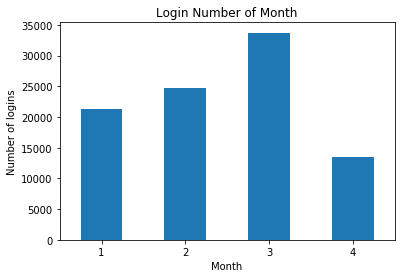

In [19]:
rdf.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Login number kept increasing from January to March. The login number of March is highest. Because there are only 13 days data in April, so it is not enough to compare with other months. 

### Login activities in different weeks

In [20]:
# Group by week
print ('[Grouping by week]')
print (rdf.groupby('week')['count'].aggregate(np.sum))

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

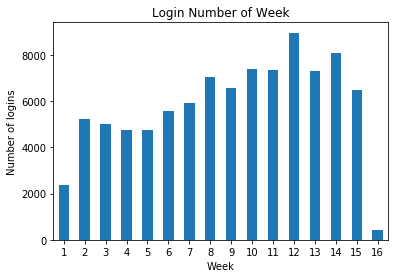

In [21]:
rdf.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.

### Login activities in different weekdays

In [22]:
# Group by weekday
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (rdf.groupby('weekday')['count'].aggregate(np.sum)/nweek)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

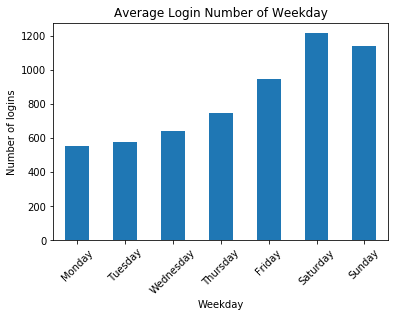

In [23]:
ax = (rdf.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most.

In [24]:
# Aggregate login counts based on 1-day time intervals
df_day = dfl.resample('D').sum()
df_day.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [25]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

,count,date,weekday
login_time,,,
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

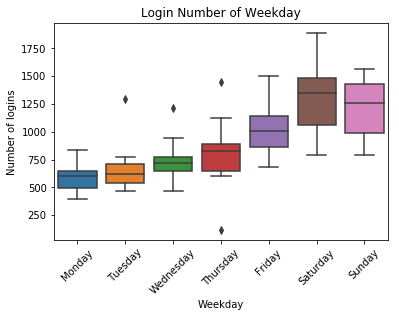

In [26]:
import seaborn as sns

ax = sns.boxplot(x='weekday', y='count', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

We can get reletively same result form the boxplot above. But there were some outliers on Tuesday, Wednesday and Thurday. Login numbers on weekends varied most.

### Login activities in daily cycle

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

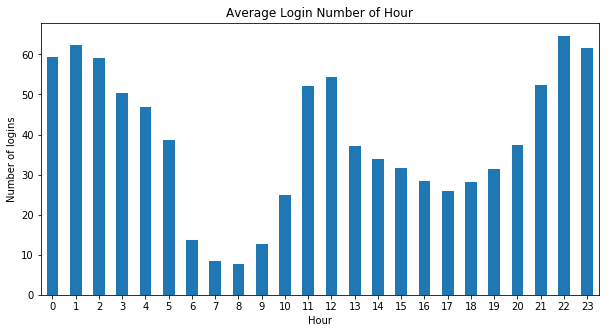

In [27]:
# Group by hour
nday = 30+28+30+13   # total days
(rdf.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon.

In [28]:
# Aggregate login counts based on 1-hour time intervals
df_hour = dfl.resample('H').sum()
df_hour.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [29]:
df_hour['time'] = pd.to_datetime(df_hour.index)
df_hour['hour'] = df_hour.time.dt.hour
df_hour.head()

,count,time,hour
login_time,,,
1970-01-01 20:00:00,24,1970-01-01 20:00:00,20
1970-01-01 21:00:00,9,1970-01-01 21:00:00,21
1970-01-01 22:00:00,21,1970-01-01 22:00:00,22
1970-01-01 23:00:00,58,1970-01-01 23:00:00,23
1970-01-02 00:00:00,53,1970-01-02 00:00:00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

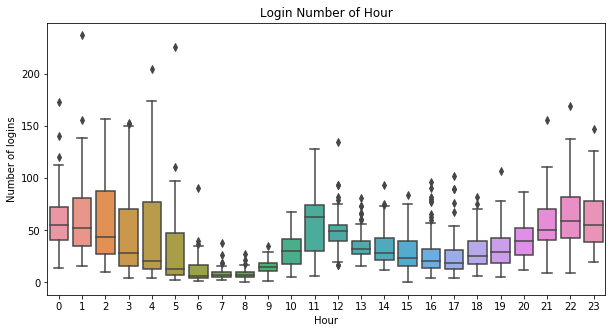

In [30]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=df_hour)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

From this boxplot, we can see same trend as in above bar chart. But we find many outliers in this plot. And vary range of 2~4 AM are bigger than other time.

### Result:

1. Login counts kept increasing from January to March and reached the peak in March.
2. In a week's step, login counts rised and droped a little. Logins in week 12 are the most. It is the last week of March. Logins in week 14 are the second most. It is the second week of April.
3. Login number kept increasing from Monday to Saturday. There are more logins in weekends than in weekdays. Logins on Saturday are the most, and logins on Sunday are the second most, while logins on Friday are the third most. Login numbers on weekends varied most.
4. Most logins are at night, from 10 PM to 2 AM. Least logins are in the moring. There are more logins at noon than in the afternoon. Login counts varied most from 2 AM to 4 AM.

---------------------------------------------------

## Part 2 ‐ Experiment and metrics design 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?   
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:   
a. how you will implement the experiment   
b. what statistical test(s) you will conduct to verify the significance of the observation   
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

### Solution:

1. I will choose the toll costs driver parterns in two cities reimbursed and the percentage of the reimbursed costs by total toll costs incharged as the key measure of success of this experiment. If the toll costs of driver parterns reimbursed increase, it indicates that more driver parterns went to another city. If the percentage of the reimbursed costs by total toll costs incharged increase, it shows that more activities between two cities are taken by driver parterns. The bigger the costs reimbursed and percentage are, the more success this experiment is.

2. I will implement the experiment by collecting the data of the toll costs reimbursed, include date, time, cost, direction, driver parterns from which city, toll costs incharged. Then we will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing, 
    + I will conduct significance tests to verify the significance of the observation.

    + I will visulize the experiment result of the trend, weekday, time of a day, direction, percentagae, ect. Then prepare a presentation to provide recommendations to the city operations team. 

------------------------------------------

## Part 3 ‐ Predictive modeling 
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file *ultimate_data_challenge.json*. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. 

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?   
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.   
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice). 

## Data description 
● **city**:   city this user signed up in   
● **phone**:   primary device for this user   
● **signup_date**:   date of account registration; in the form ‘YYYY MM DD’   
● **last_trip_date**:   the last time this user completed a trip; in the form ‘YYYY MM DD’   
● **avg_dist**:   the average distance in miles per trip taken in the first 30 days after signup   
● **avg_rating_by_driver**:   the rider’s average rating over all of their trips   
● **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips   
● **surge_pct**:   the percent of trips taken with surge multiplier > 1   
● **avg_surge**: the average surge multiplier over all of this user’s trips   
● **trips_in_first_30_days**: the number of trips this user took in the first 30 days after signing up    
● **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise   
● **weekday_pct**:   the percent of the user’s trips occurring during a weekday 

### I. Data Wrangling

In [31]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [32]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in columns 'avg_rating_by_driver', 'avg_rating_of_driver', and 'phone'.

In [34]:
# Fill in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [35]:
df = df.reset_index(drop=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [37]:
# Convert dates to datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


### II. Exploratory Data Analysis

In [39]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

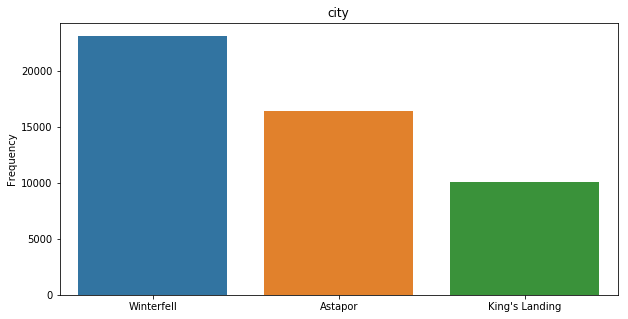

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


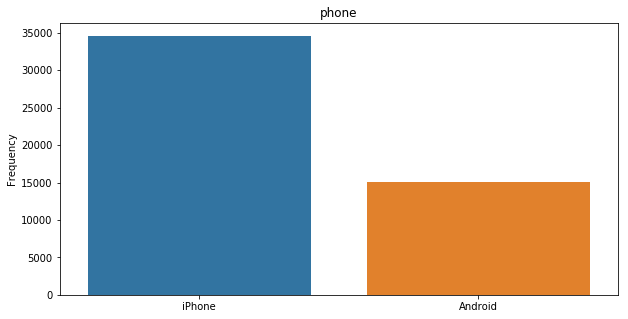

iPhone     34582
Android    15022
Name: phone, dtype: int64


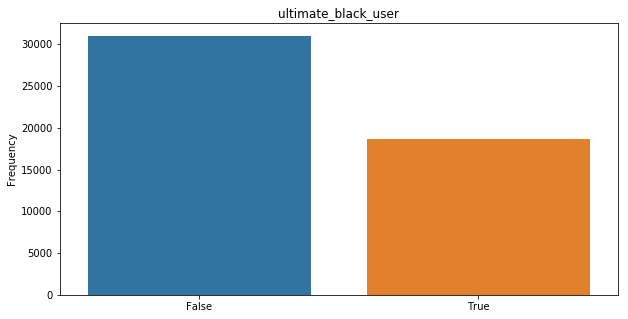

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [40]:
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [41]:
# Show distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


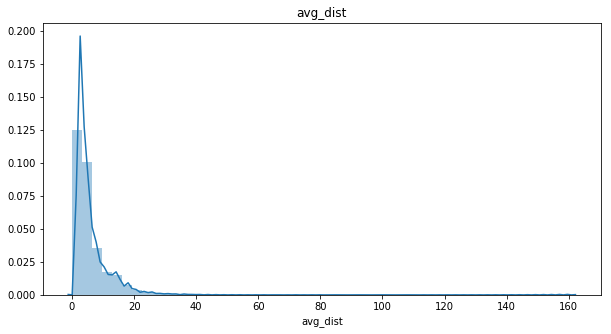

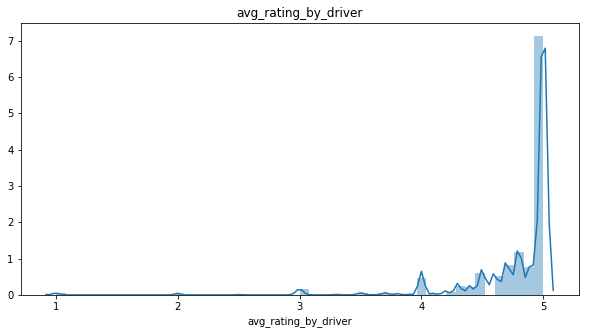

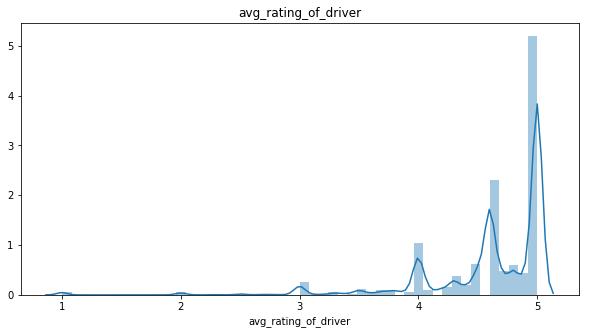

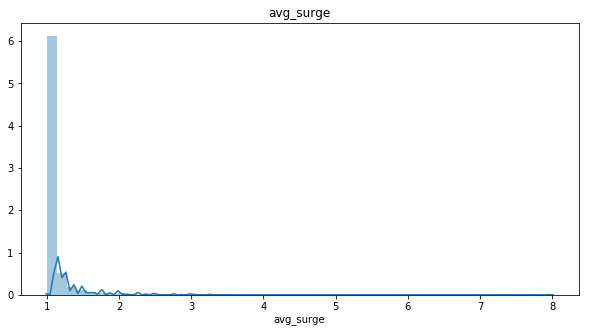

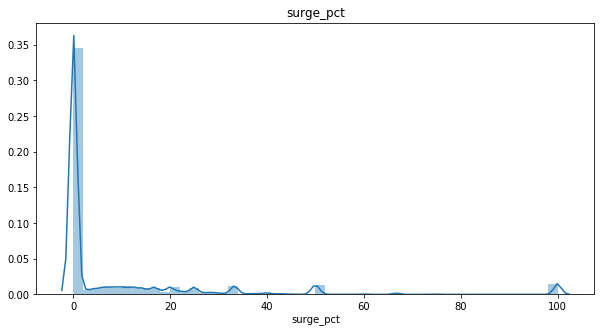

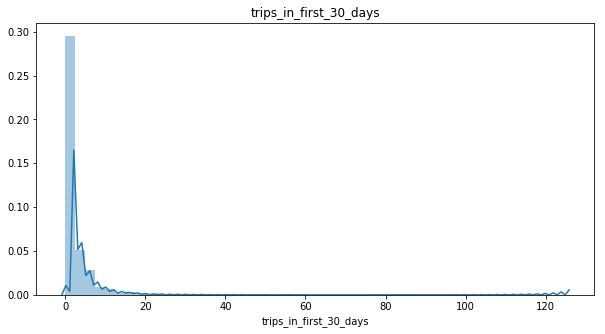

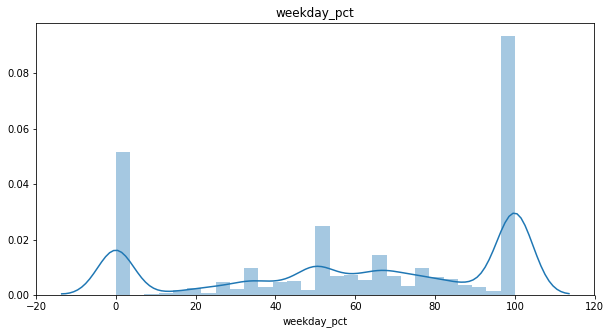

In [42]:
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.title(feature)
    plt.show();

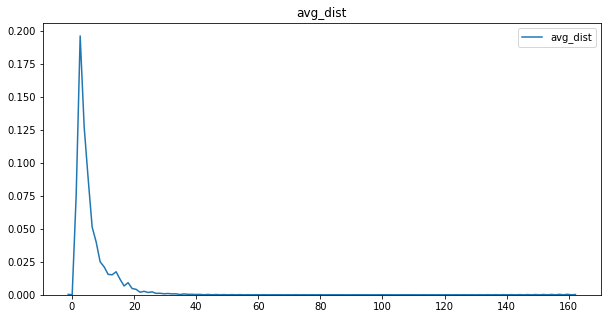

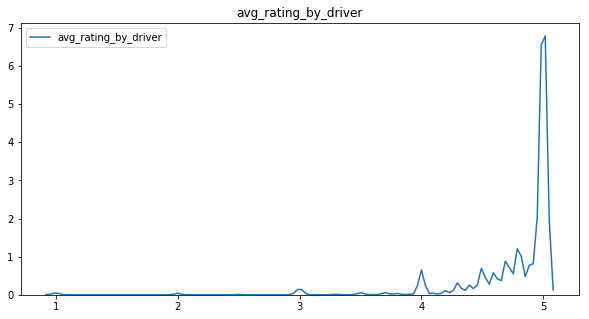

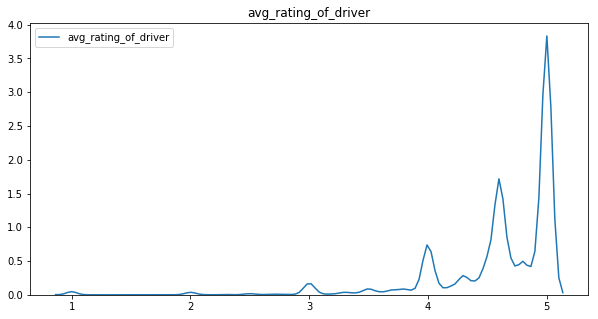

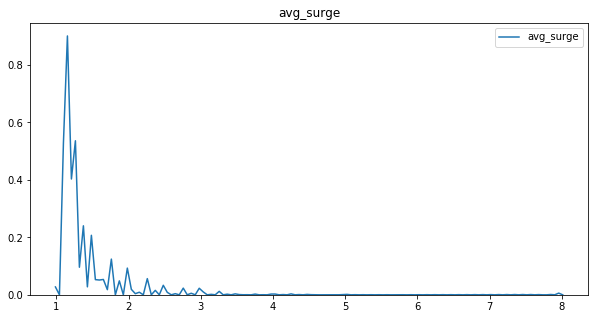

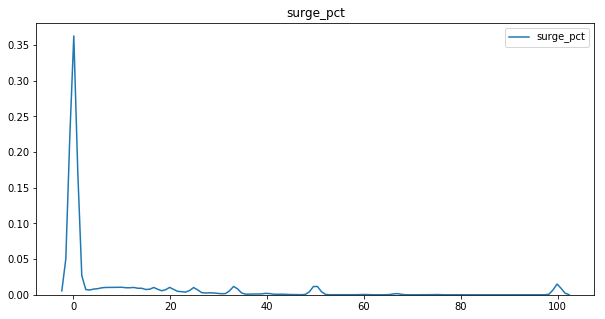

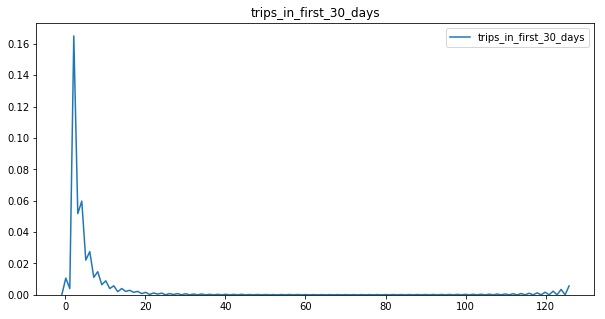

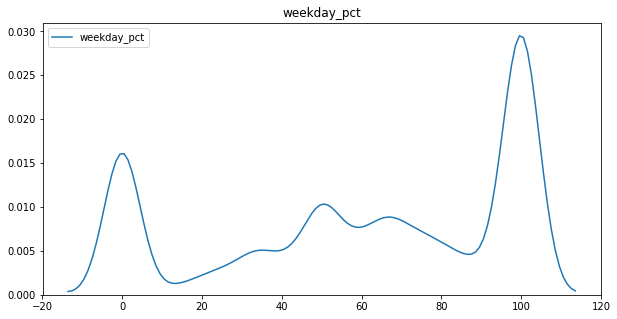

In [43]:
for feature in numerical_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

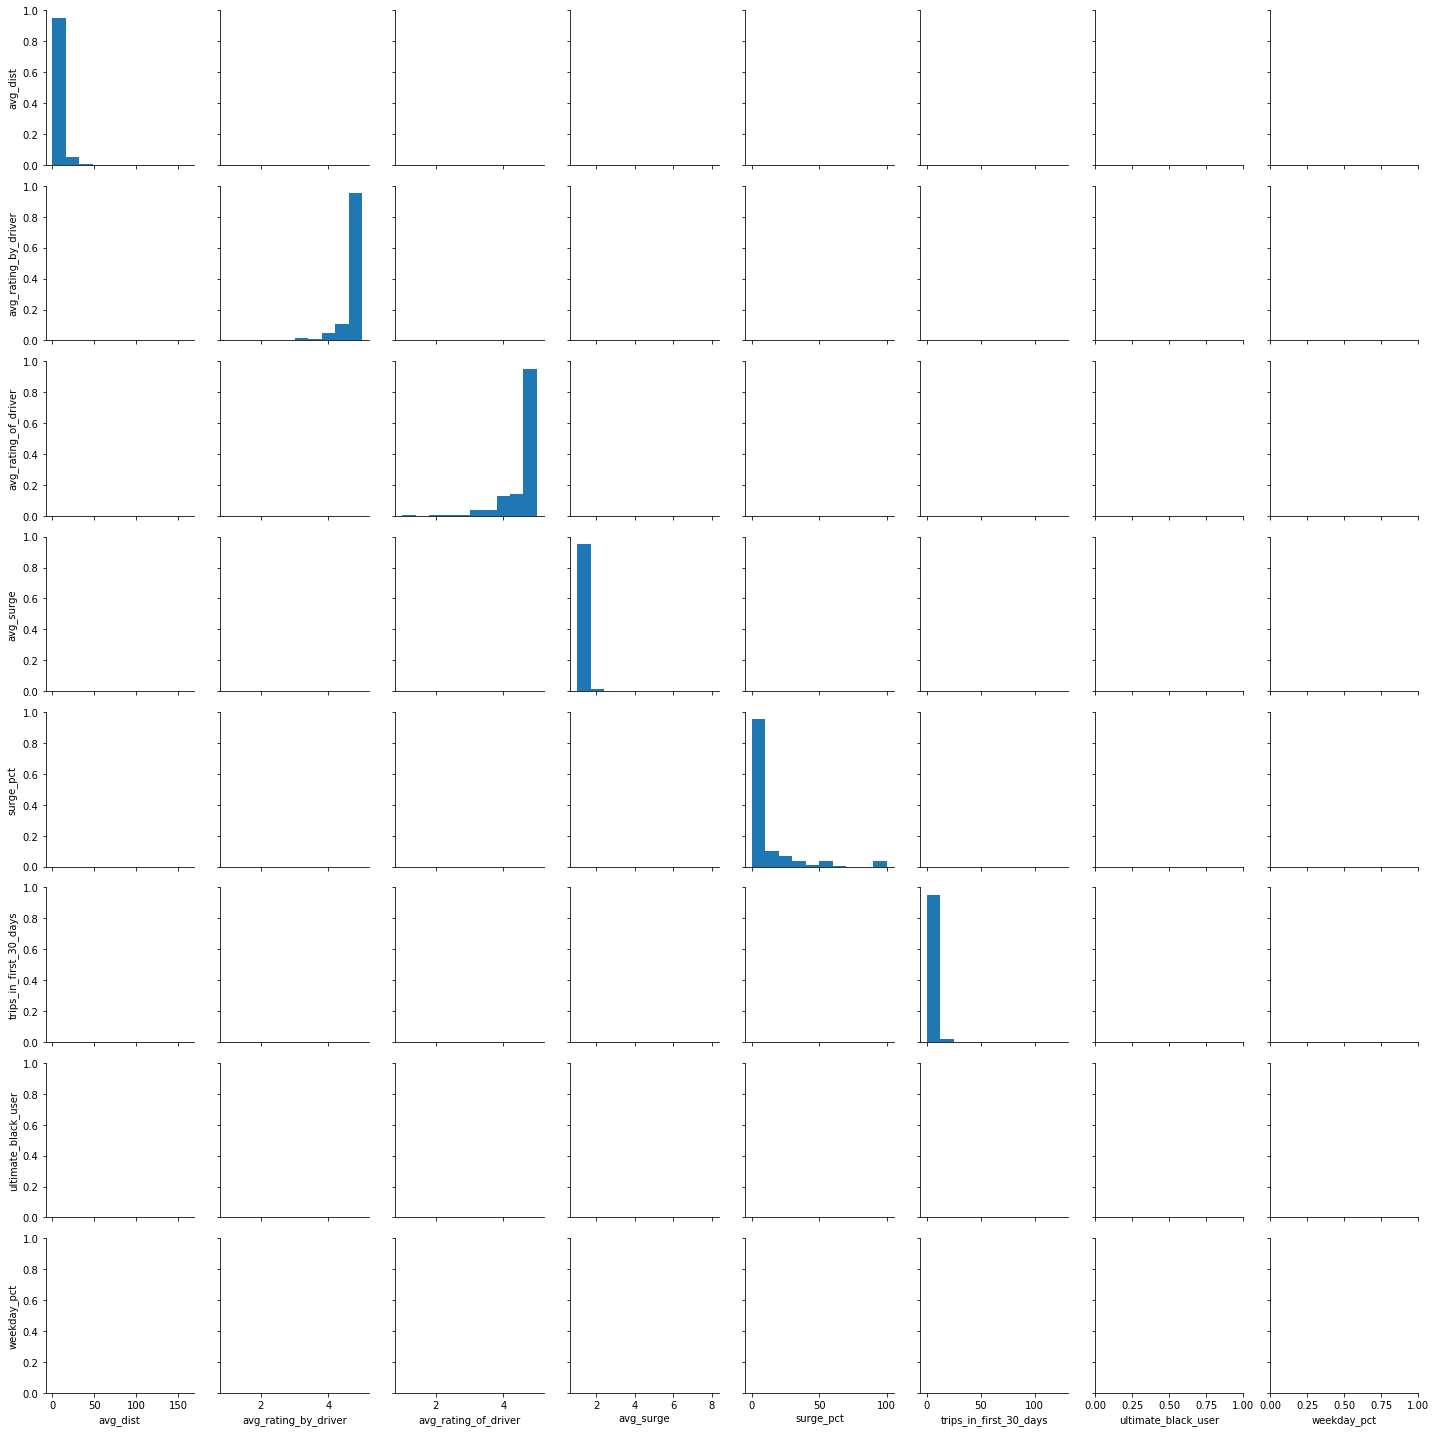

In [44]:
sns.pairplot(df)

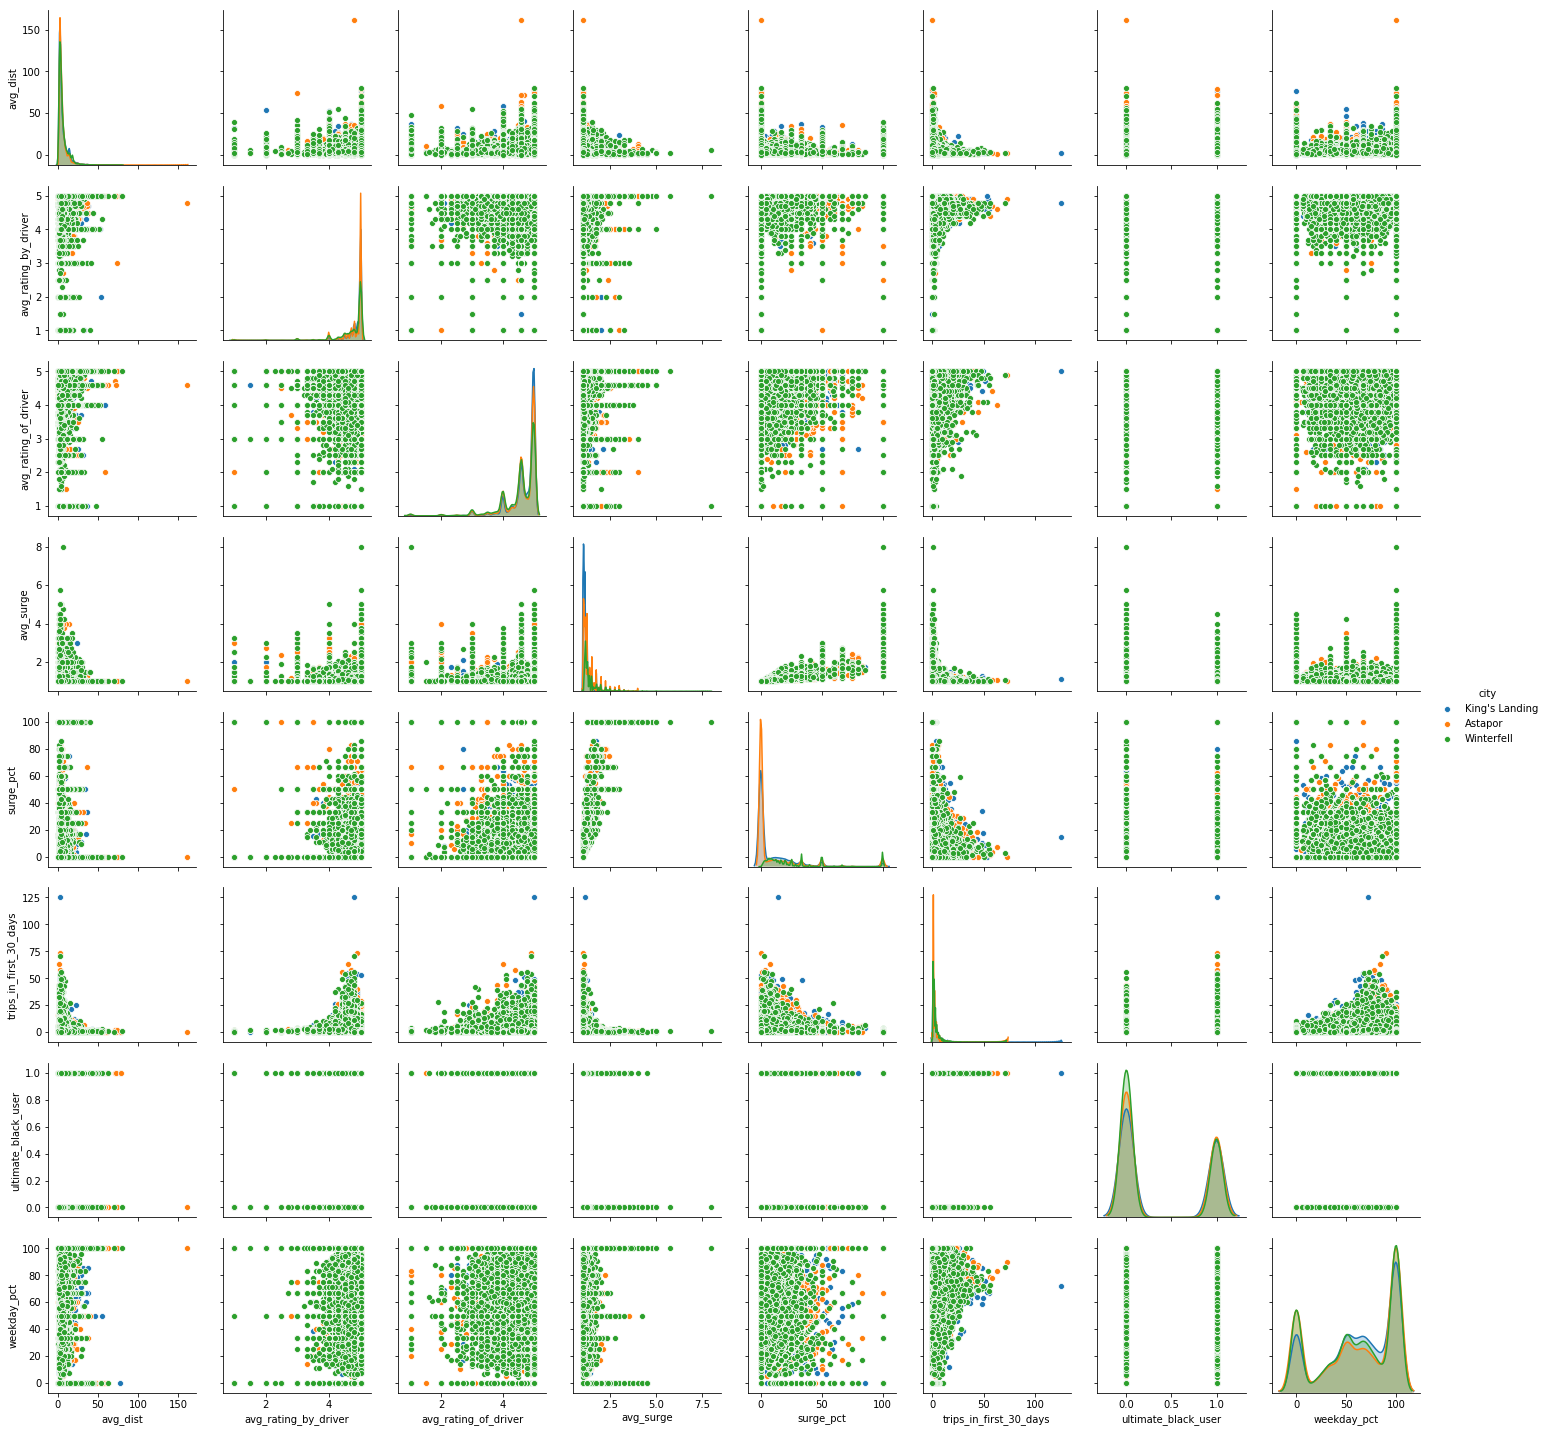

In [45]:
sns.pairplot(df, hue='city')

__What fraction of the observed users were retained?__

In [46]:
df.sort_values(by='last_trip_date').tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
45166,2.32,4.8,4.4,1.14,King's Landing,2014-07-01,Android,2014-01-25,17.9,2,False,83.9
12053,2.64,4.8,4.9,1.02,King's Landing,2014-07-01,Android,2014-01-18,3.9,16,False,74.0
18667,6.22,4.8,4.7,1.02,Astapor,2014-07-01,iPhone,2014-01-10,3.2,3,False,67.7
11999,6.80,4.9,4.7,1.04,Winterfell,2014-07-01,iPhone,2014-01-24,15.4,1,True,38.5
31351,5.63,4.7,4.9,1.07,Winterfell,2014-07-01,iPhone,2014-01-19,6.0,12,True,70.0


In [47]:
df['last_trip_date'].sort_values().tail()

45166   2014-07-01
12053   2014-07-01
18667   2014-07-01
11999   2014-07-01
31351   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

So the latest 'last_trip_date' is 2014-07-01. As we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days, We consider a user retained if his 'last_trip_date' is after 2014-06-01. 

In [48]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


### III. Data Modeling

#### 3.1 Prepare dataset

In [49]:
# Create the target variable -- retained

df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

In [50]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
retained                  49604 non-null int32
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [52]:
# Drop datetime features
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [53]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [54]:
# Creating dummy variables for categorical features
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [55]:
ndf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,0,0


ndf is the final dataset we will use for modeling in next step.

#### 3.2 Split data into training and test sets

In [56]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


#### 3.3 Machine Learning Model

We will use Random Forest Classifier here. Random forests algorithm is among the most popular machine learning methods thanks to its relatively good accuracy, robustness and ease of use. It is also often used for feature selection. 

Below are the advantages of random forest algorithm compared with other classification algorithms.
* The overfitting problem will never come when we use the random forest algorithm in any classification problem.
* The random forest algorithm can be used for feature engineering.
 + Which means identifying the most important features out of the available features from the training dataset.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [59]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

[0.76200076 0.75091344 0.76149679 0.75696107 0.75614367]
Average 5-Fold CV Score: 0.7575031444458761


So, using Random Forest Claasifier with default parameters, we can get a model with 75.73% accuracy.

#### 3.4 Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [62]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [63]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test) 

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\ravi\appdata\local\

In [64]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': False}
Tuned Score: 0.7680870901897539

Test set performance:
Accuracy:  0.7635319020260054
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6290
           1       0.68      0.66      0.67      3631

   micro avg       0.76      0.76      0.76      9921
   macro avg       0.75      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921



After hyperparameter tuning, we get the best parameters of n_estimators=100, max_features=8, oob_score=True with accuracy of 76.82%. 

#### 3.5 Final Model

In [65]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6290
           1       0.68      0.66      0.67      3631

   micro avg       0.76      0.76      0.76      9921
   macro avg       0.74      0.74      0.74      9921
weighted avg       0.76      0.76      0.76      9921

Test set accuracy: 76.03%


In [68]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,5164,1126
1,1252,2379


Text(0.5, 1.0, 'ROC Curve')

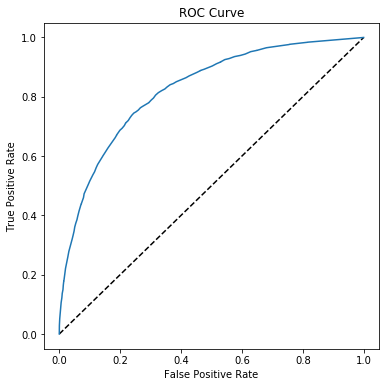

In [69]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [70]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8235


The metrics of final model are:
1. Test set accuracy: 76.30%
2. AUC: 0.8234

#### 3.6 Feature Selection

In [71]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
0,avg_dist,0.297235
1,avg_rating_by_driver,0.155084
6,weekday_pct,0.114544
2,avg_rating_of_driver,0.080384
4,surge_pct,0.079873


From the importance of features, we find that the most important 3 features are:   
1. **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup  
2. **avg_rating_by_driver**: the rider’s average rating over all of their trips  
3. **weekday_pct**: the percent of the user’s trips occurring during a weekday  

### IV. Suggestions to Ultimate

To improve long-term rider retention, Ultimate need improve in the following aspects:   
1. Attract riders to take longer trips during the first 30 days after signup.  
2. Provide better service to get higher ratings from the riders.
3. Persuade riders to take trips during weekdays.